In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('datasets/hitters.csv')


In [4]:
df.head()

,CRBI,RBI,CAtBat,AtBat,Walks,Assists,PutOuts,Years,NewLeague,Runs,Salary
0,29.0,29.0,293.0,293.0,14.0,33.0,446.0,1.0,0,30.0,278.188081
1,414.0,38.0,3449.0,315.0,39.0,43.0,632.0,14.0,1,24.0,475.000000
2,266.0,72.0,1624.0,479.0,76.0,82.0,880.0,3.0,0,66.0,480.000000
3,838.0,78.0,5628.0,496.0,37.0,11.0,200.0,11.0,1,65.0,500.000000
4,46.0,42.0,396.0,321.0,30.0,40.0,805.0,2.0,1,39.0,91.500000


| Column Name | Description (English)                             | Beschreibung (Deutsch)                                        |
|-------------|---------------------------------------------------|---------------------------------------------------------------|
| CRBI        | Career Runs Batted In                             | Karriere-Runs Batted In                                       |
| RBI         | Runs Batted In                                    | Runs Batted In                                                |
| CAtBat      | Career At Bats                                    | Karriere-Schlagversuche                                       |
| AtBat       | At Bats in the current season                     | Schlagversuche in der aktuellen Saison                        |
| Walks       | Number of walks                                   | Anzahl der Walks                                              |
| Assists     | Number of assists                                 | Anzahl der Assists                                            |
| PutOuts     | Number of putouts                                 | Anzahl der Ausmachen                                          |
| Years       | Number of years in the league                     | Anzahl der Jahre in der Liga                                  |
| NewLeague   | Indicator if the player is new to the league (0 = No, 1 = Yes) | Anzeiger, ob der Spieler neu in der Liga ist (0 = Nein, 1 = Ja) |
| Runs        | Number of runs                                    | Anzahl der Runs                                               |
| Salary      | Player's salary (in thousands of dollars, may vary) | Gehalt des Spielers (in Tausend Dollar, kann variieren)       |


## Step 2. Prepare the data

In [5]:
from mymodule import check_df, find_categorical_columns, binary_columns_find

In [6]:
check_df(df)

##################### Shape #####################
(322, 11)
##################### Duplicate Values #####################
0
##################### NA #####################
CRBI         0
RBI          0
CAtBat       0
AtBat        0
Walks        0
Assists      0
PutOuts      0
Years        0
NewLeague    0
Runs         0
Salary       0
dtype: int64
##################### Types #####################
CRBI         float64
RBI          float64
CAtBat       float64
AtBat        float64
Walks        float64
Assists      float64
PutOuts      float64
Years        float64
NewLeague      int64
Runs         float64
Salary       float64
dtype: object
##################### Head #####################
    CRBI   RBI  CAtBat  AtBat  Walks  Assists  PutOuts  Years  NewLeague  \
0   29.0  29.0   293.0  293.0   14.0     33.0    446.0    1.0          0   
1  414.0  38.0  3449.0  315.0   39.0     43.0    632.0   14.0          1   
2  266.0  72.0  1624.0  479.0   76.0     82.0    880.0    3.0          0   

   

In [8]:
categorical_columns=find_categorical_columns(df)
categorical_columns

['NewLeague']

In [9]:
binary_columns=binary_columns_find(df)
binary_columns

['NewLeague']

In [10]:
numerical_columns = [col for col in df.columns if df[col].dtypes in ["int","float", 'int64']]
numerical_columns = [col for col in numerical_columns if col not in categorical_columns]
numerical_columns

['CRBI',
 'RBI',
 'CAtBat',
 'AtBat',
 'Walks',
 'Assists',
 'PutOuts',
 'Years',
 'Runs',
 'Salary']

## Step 3. Analyze the data

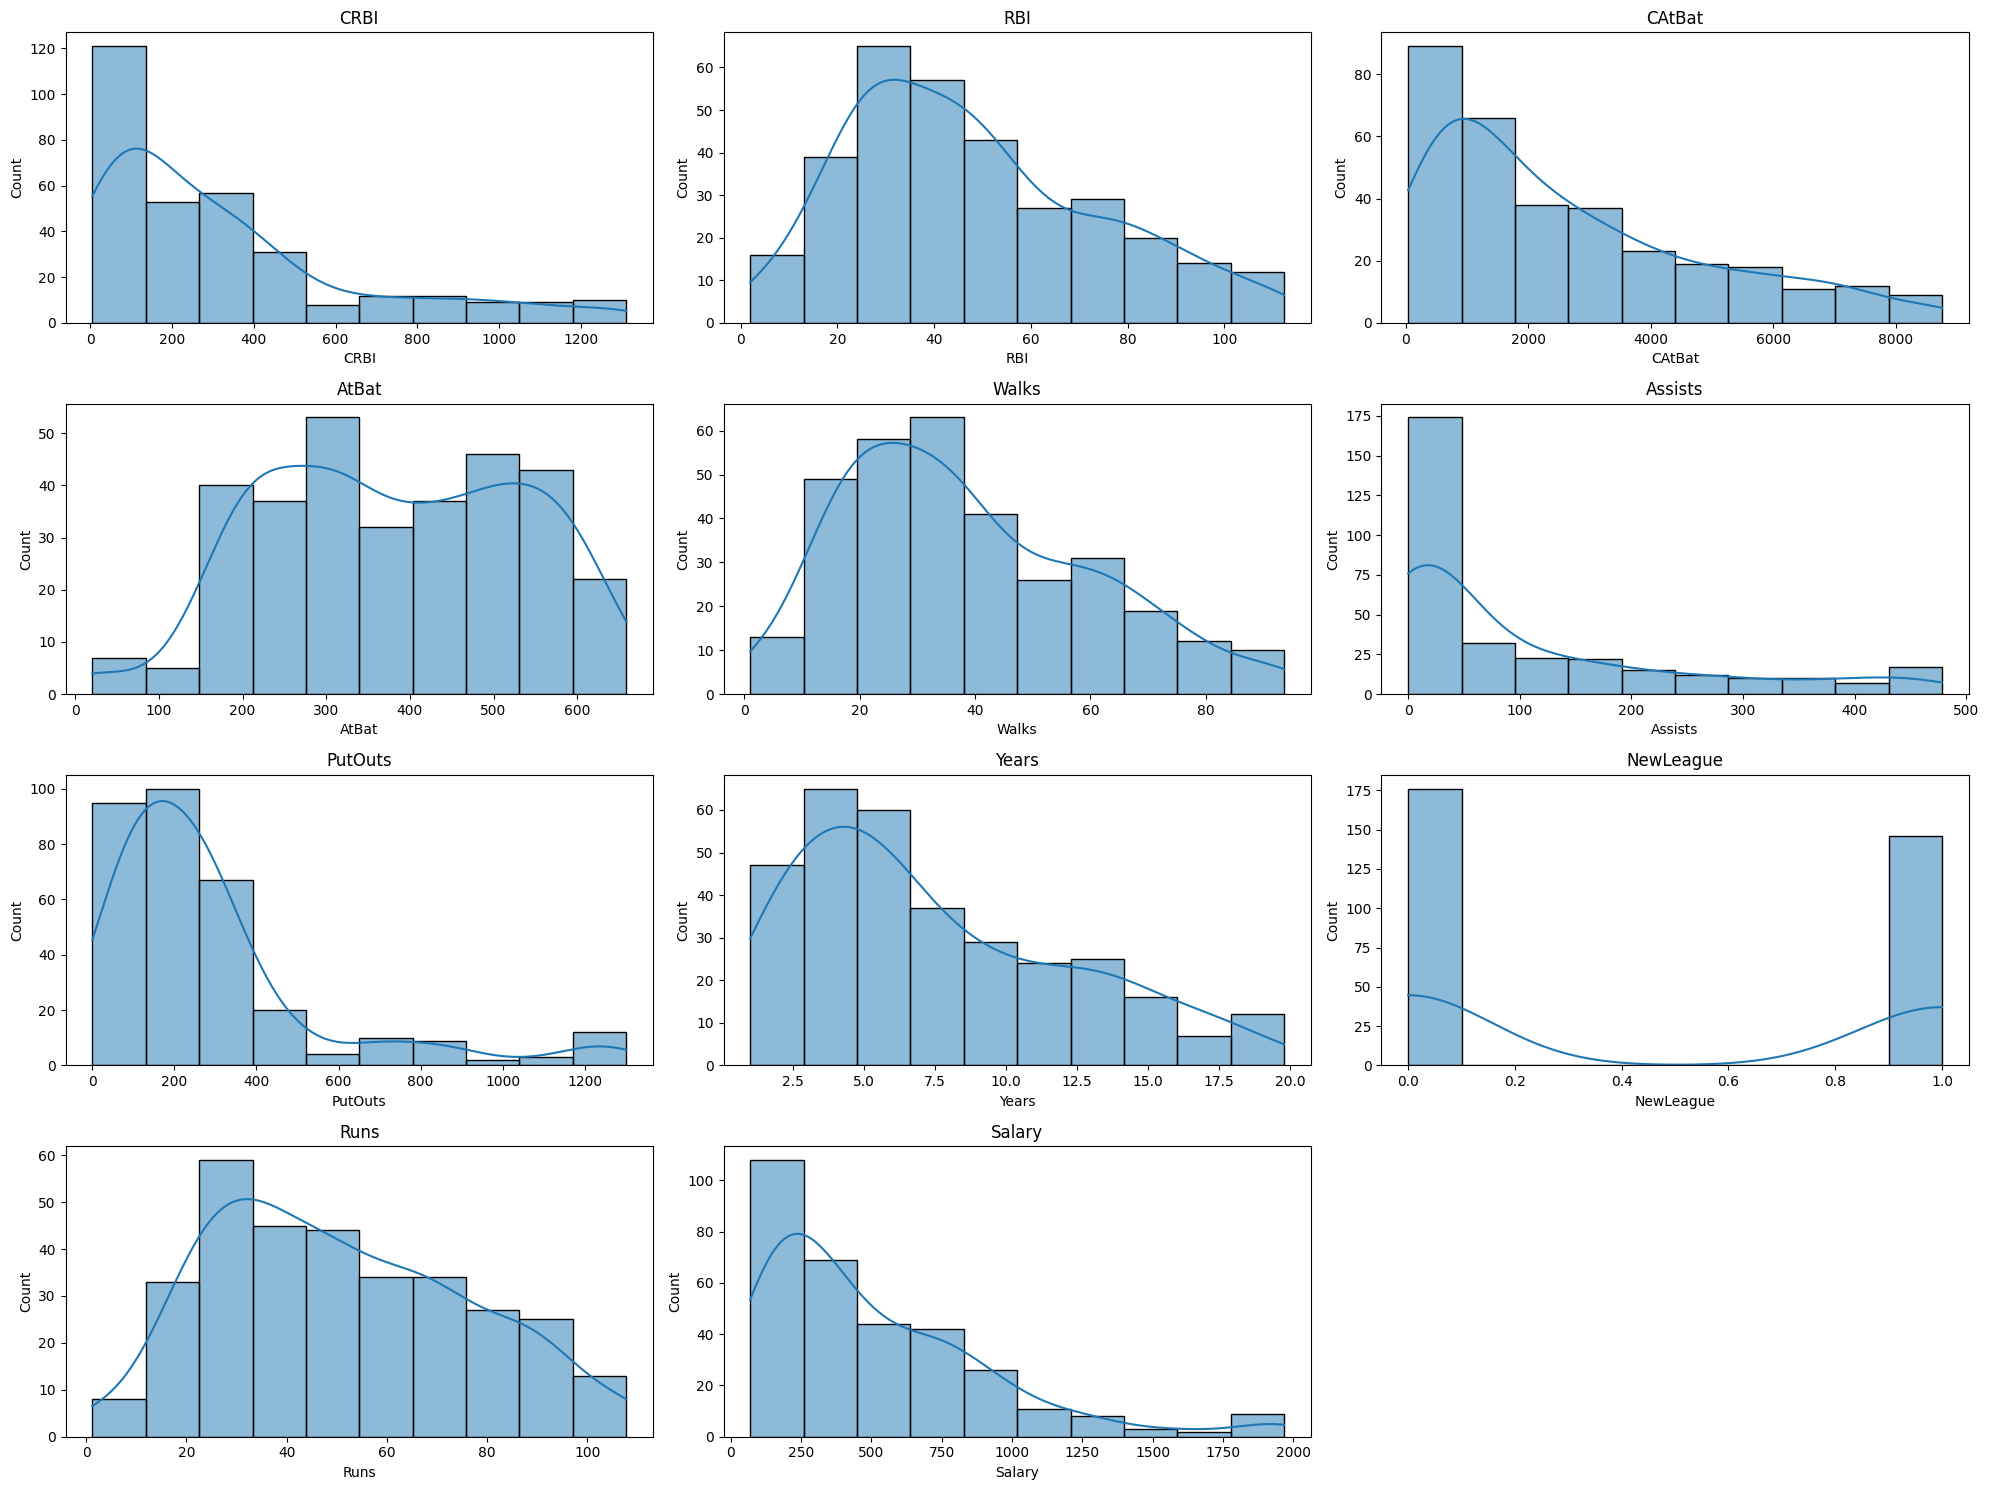

In [16]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True, bins=10)
    plt.title(column)
plt.tight_layout()
plt.show()

In [11]:
le = LabelEncoder()
for col in binary_columns:
    df[col] = le.fit_transform(df[col])

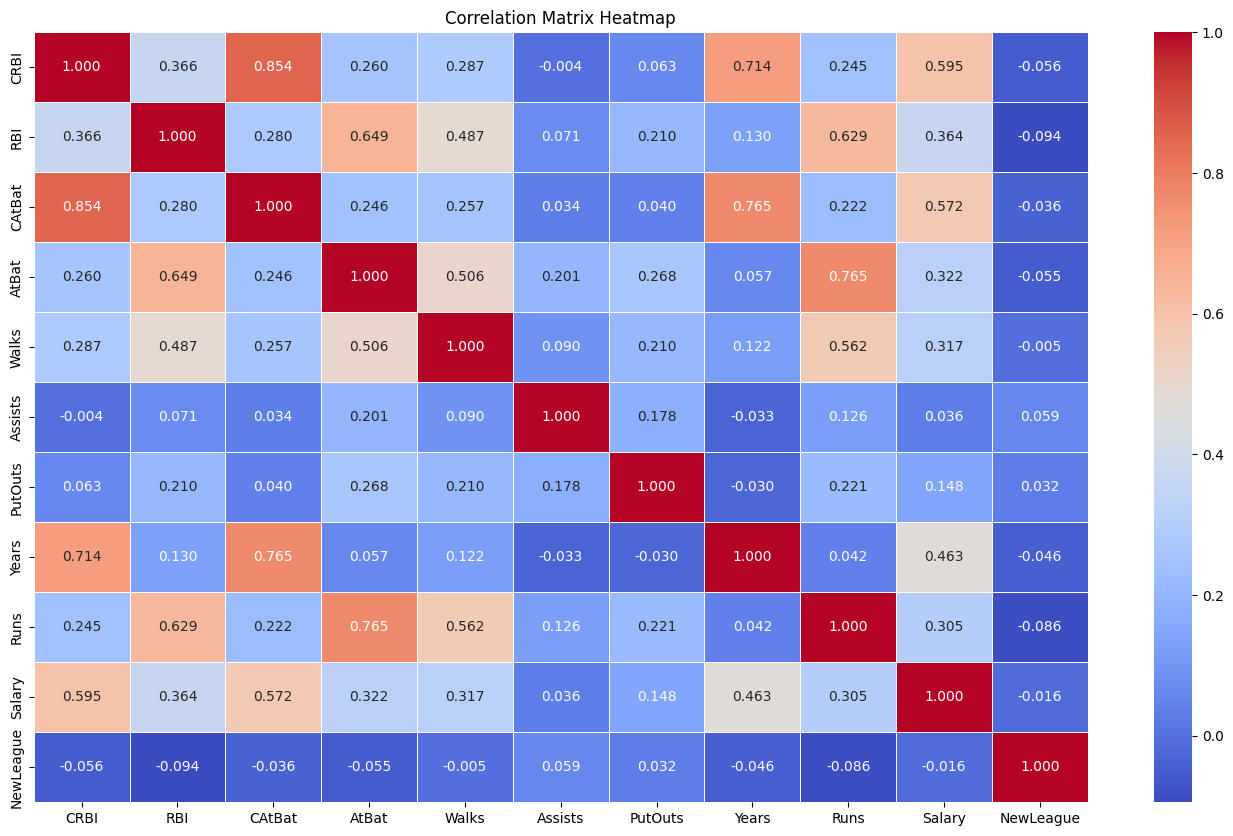

In [17]:
#method: {'pearson', 'kendall', 'spearman'}
correlation_matrix = df[numerical_columns+binary_columns].corr(method= 'kendall')
plt.figure(figsize=(17, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [23]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.95):
    corr = dataframe.corr(method= 'kendall')
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

In [24]:

high_correlated_columns=high_correlated_cols(df)
high_correlated_columns

[]

In [30]:
from ipywidgets import interact, Dropdown, FloatSlider, HBox
import plotly.graph_objs as go
import pandas as pd
import plotly.subplots as sp

In [ ]:
 ### Visualization for Two Numerical Columns:

In [31]:

numerical_columns_sorted = sorted(numerical_columns)
categorical_columns_sorted = sorted(categorical_columns)
numerical_dropdown = Dropdown(options=numerical_columns_sorted, description='Numerical Column:')
categorical_dropdown = Dropdown(options=categorical_columns_sorted, description='Categorical Column:')

In [33]:
numerical_columns_sorted = sorted(numerical_columns) 
def update_numerical_plot(x_column, y_column):
    fig = sp.make_subplots(rows=2, cols=2, 
                           column_widths=[0.90, 0.15], 
                           row_heights=[0.15, 0.85],
                           shared_xaxes=True,
                           shared_yaxes=True,
                           vertical_spacing=0.02,
                           horizontal_spacing=0.02,
                           subplot_titles=(None, None, f'Scatter Plot of {x_column} vs {y_column}'))
    fig.add_trace(go.Scatter(x=df[x_column], y=df[y_column], mode='markers', name='scatter'), row=2, col=1)
    fig.add_trace(go.Histogram(x=df[x_column], name=f'histogram {x_column}'), row=1, col=1)
    fig.add_trace(go.Histogram(y=df[y_column], name=f'histogram {y_column}', orientation='h'), row=2, col=2)
    fig.update_layout(height=800, width=1200, showlegend=False)
    fig.show()
x_dropdown = Dropdown(options=numerical_columns_sorted, description='X-axis:')
y_dropdown = Dropdown(options=numerical_columns_sorted, description='Y-axis:')
interact(update_numerical_plot, x_column=x_dropdown, y_column=y_dropdown)

interactive(children=(Dropdown(description='X-axis:', options=('Assists', 'AtBat', 'CAtBat', 'CRBI', 'PutOuts'…

<function __main__.update_numerical_plot(x_column, y_column)>

In [ ]:
 ### Visualizing the relationship between a categorical variable and  numerical columns 

In [34]:
def update_plot(numerical_column, categorical_column):
    data = []
    categories = df[categorical_column].unique().tolist()
    if pd.isna(categories).any():
        categories.append(np.nan)
    for category in categories:
        if pd.isna(category):
            category_name = 'missing'  
            subset = df[pd.isna(df[categorical_column])][numerical_column]
        else:
            category_name = str(category)
            subset = df[df[categorical_column] == category][numerical_column]

        data.append(
            go.Box(
                y=subset,
                name=category_name
            )
        )
    fig = go.Figure(data=data)
    fig.update_layout(title=f'Distribution of {numerical_column} by {categorical_column} (including Missing)')
    fig.show()
interact(update_plot, numerical_column=numerical_dropdown, categorical_column=categorical_dropdown)

interactive(children=(Dropdown(description='Numerical Column:', index=7, options=('Assists', 'AtBat', 'CAtBat'…

<function __main__.update_plot(numerical_column, categorical_column)>

## Analyzing the outlier

### Be careful define the timeseries  outliers 

In [41]:
df.head()

,CRBI,RBI,CAtBat,AtBat,Walks,Assists,PutOuts,Years,NewLeague,Runs,Salary
0,29.0,29.0,293.0,293.0,14.0,33.0,446.0,1.0,0,30.0,278.188081
1,414.0,38.0,3449.0,315.0,39.0,43.0,632.0,14.0,1,24.0,475.000000
2,266.0,72.0,1624.0,479.0,76.0,82.0,880.0,3.0,0,66.0,480.000000
3,838.0,78.0,5628.0,496.0,37.0,11.0,200.0,11.0,1,65.0,500.000000
4,46.0,42.0,396.0,321.0,30.0,40.0,805.0,2.0,1,39.0,91.500000


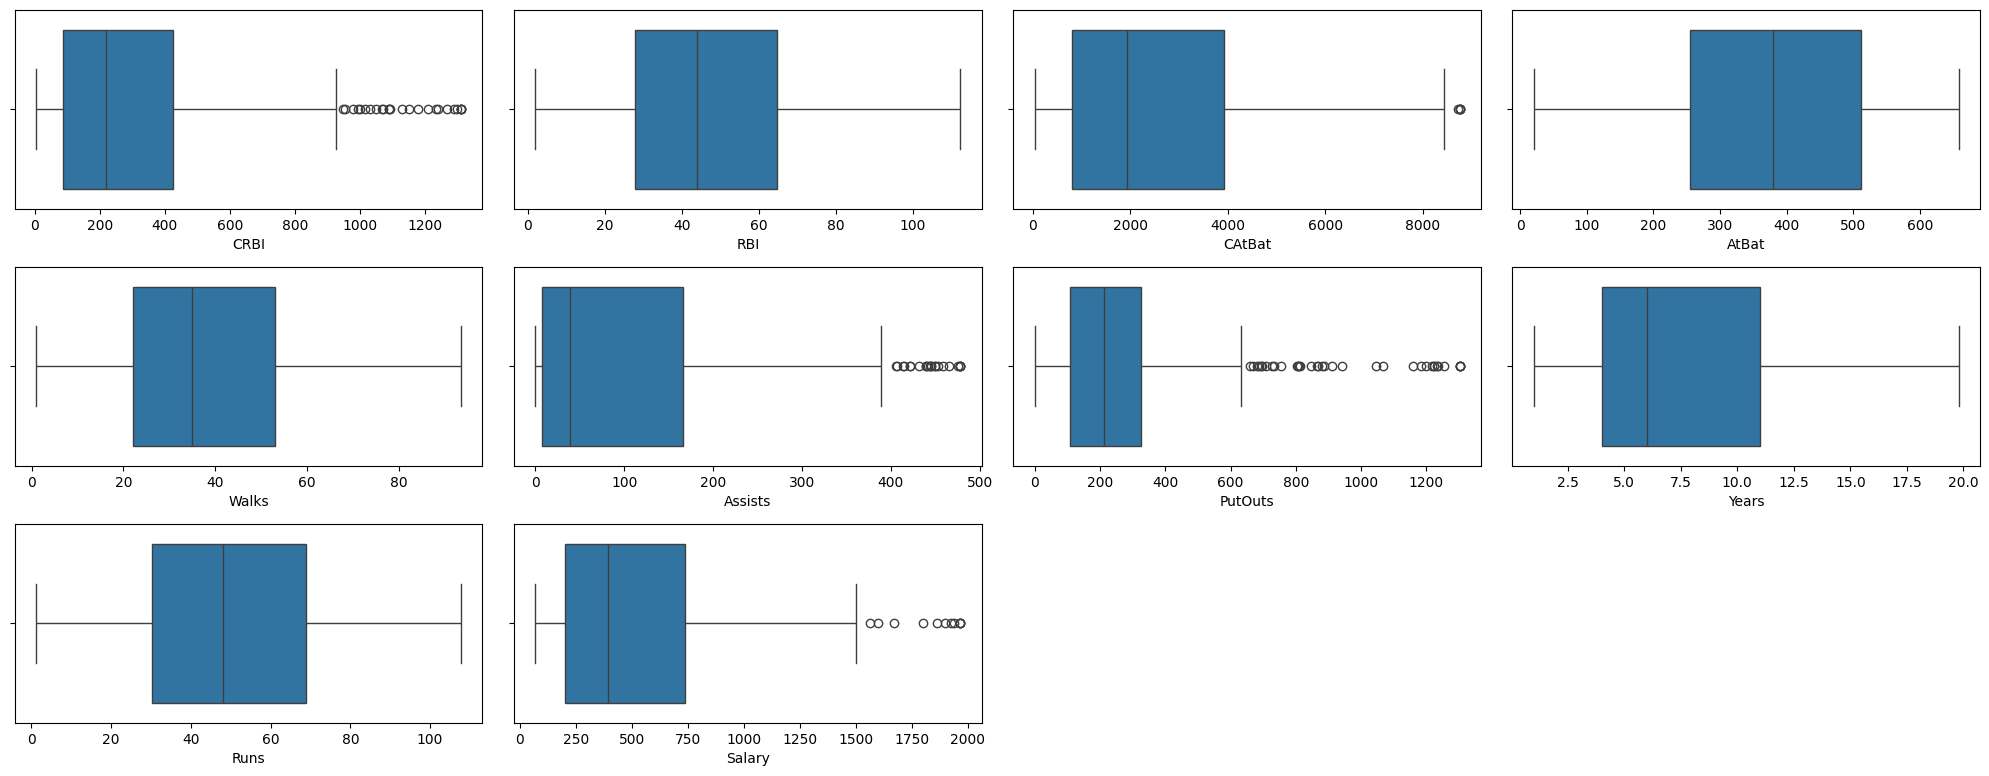

In [38]:
plt.figure(figsize=(20, 10)) 
for index, column in enumerate(df[numerical_columns]):
    plt.subplot(4, 4, index + 1)  
    sns.boxplot(x=column, data=df)
plt.tight_layout() 
plt.show()

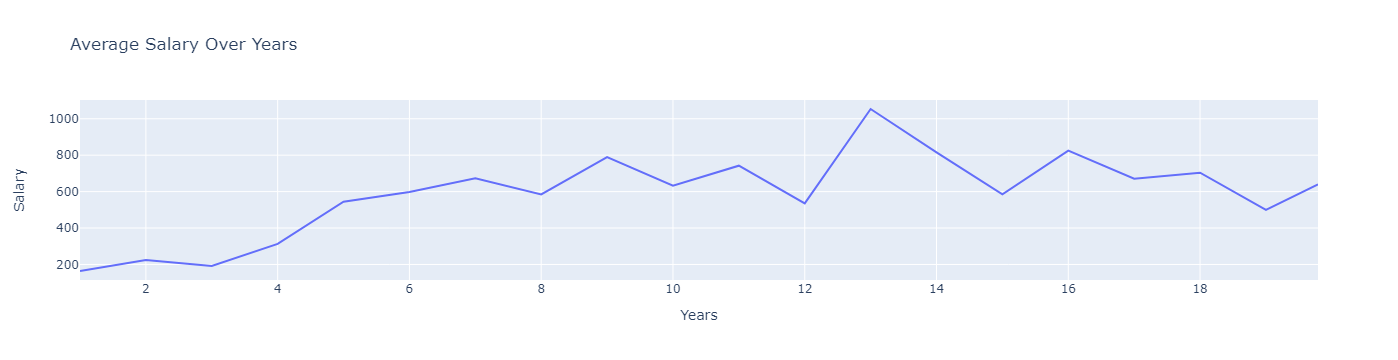

In [39]:
import plotly.express as px
grouped_df = df.groupby('Years')['Salary'].mean().reset_index()
fig = px.line(grouped_df, x='Years', y='Salary', title='Average Salary Over Years')
fig.show()


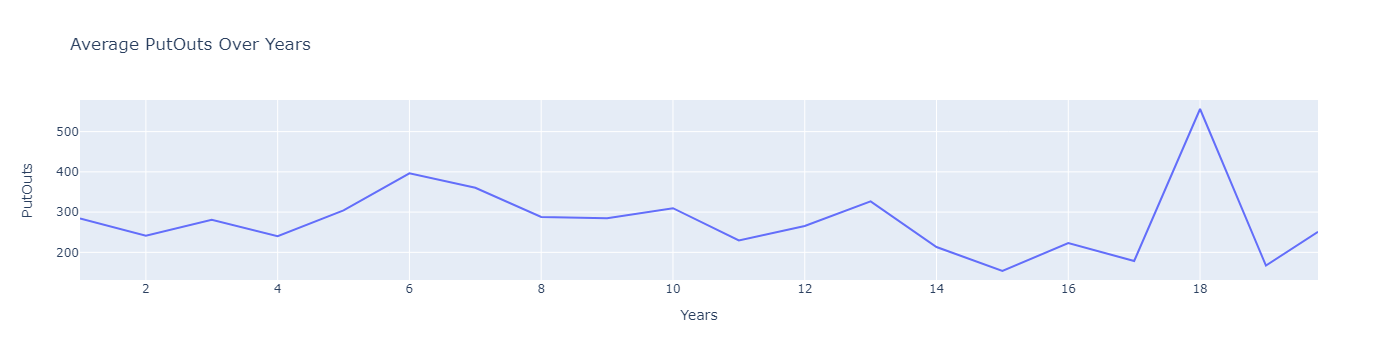

In [40]:
import plotly.express as px
grouped_df = df.groupby('Years')['PutOuts'].mean().reset_index()
fig = px.line(grouped_df, x='Years', y='PutOuts', title='Average PutOuts Over Years')
fig.show()

In [42]:
def find_outlier_columns(df, q1_value, q2_value):
    """
    Identify columns in the DataFrame that contain outliers.
    :param df: A pandas DataFrame.
    :return: A list of column names that have outliers.
    """
    outlier_columns = []
    numerical_cols = df.select_dtypes(include=['number']).columns
    # q1_value=0.25
    # q2_value=0.75
    for col in numerical_cols:
        Q1 = df[col].quantile(q1_value)
        Q3 = df[col].quantile(q2_value)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)
    return outlier_columns

In [43]:
find_outlier_columns(df, 0.05, 0.99)

[]

# Time to practice Part 1 

 # Step 3 Model training and  prediction


In [44]:
X = df.drop('Salary', axis=1)
y = df[["Salary"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

In [45]:
model = DecisionTreeRegressor()

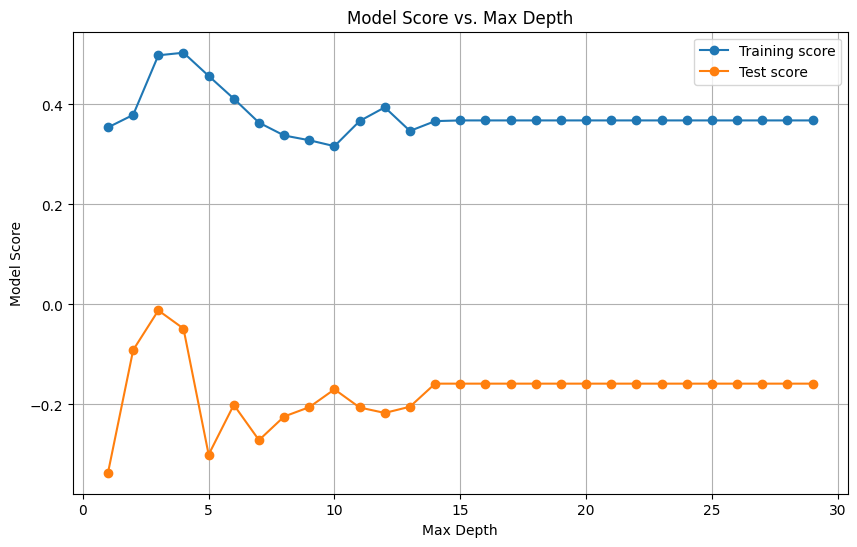

In [46]:
max_depth_range = np.arange(1, 30) 
train_scores, test_scores = [], []
for max_depth in max_depth_range:
    dtree = DecisionTreeRegressor(max_depth=max_depth, random_state=99)
    train_score = np.mean(cross_val_score(dtree, X_train, y_train, scoring ='r2', cv=3))
    train_scores.append(train_score)
    test_score = np.mean(cross_val_score(dtree, X_test, y_test, scoring ='r2', cv=3))
    test_scores.append(test_score)
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_scores, label='Training score', marker='o')
plt.plot(max_depth_range, test_scores, label='Test score', marker='o')
plt.title('Model Score vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Model Score')
plt.legend()
plt.grid(True)
plt.show()

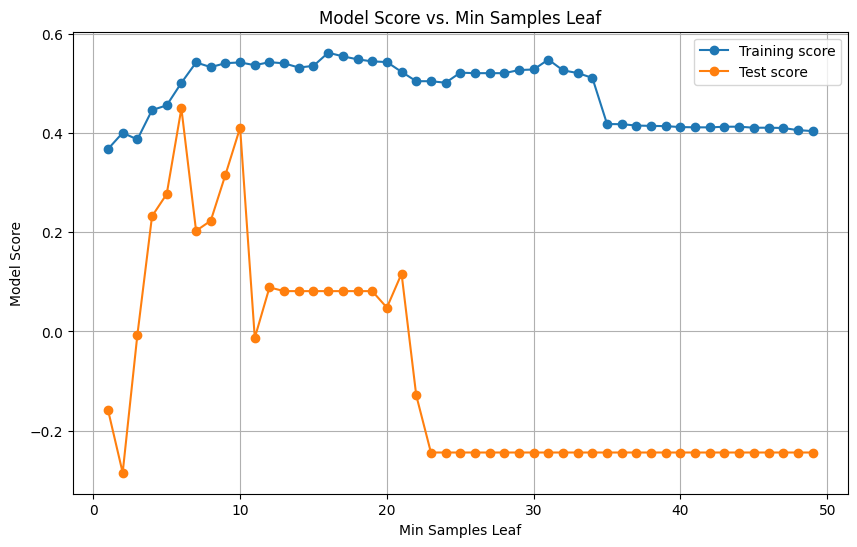

In [47]:
min_samples_leaf_values = np.arange(1, 50) 
train_scores, test_scores = [], []

for min_samples_leaf in min_samples_leaf_values:
    dtree = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=99)
    train_score = np.mean(cross_val_score(dtree, X_train, y_train, scoring ='r2', cv=3))
    train_scores.append(train_score)
    test_score = np.mean(cross_val_score(dtree, X_test, y_test, scoring ='r2', cv=3))
    test_scores.append(test_score)

plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_scores, label='Training score', marker='o')
plt.plot(min_samples_leaf_values, test_scores, label='Test score', marker='o')
plt.title('Model Score vs. Min Samples Leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Model Score')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
dtree = DecisionTreeRegressor(random_state=99)
param_grid = {
    'max_depth':  np.arange(3, 10) ,
    'min_samples_leaf': np.arange(1, 20),
}
grid_search = GridSearchCV(dtree, param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 133 candidates, totalling 399 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=99),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='r2', verbose=1)

In [49]:
# Best model
best_dtree = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 16}


In [50]:
y_pred_train = best_dtree.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 56632.79369328827
R^2 Score: 0.646670619368638


In [51]:
y_pred = best_dtree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 98518.63603397798
R^2 Score: 0.5254094271065164


In [52]:

def val_curve_params(model, X, y, param_name, param_range, scoring="r2"):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score, label="Training Score", color='b')
    plt.plot(param_range, mean_test_score, label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(scoring)
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show()

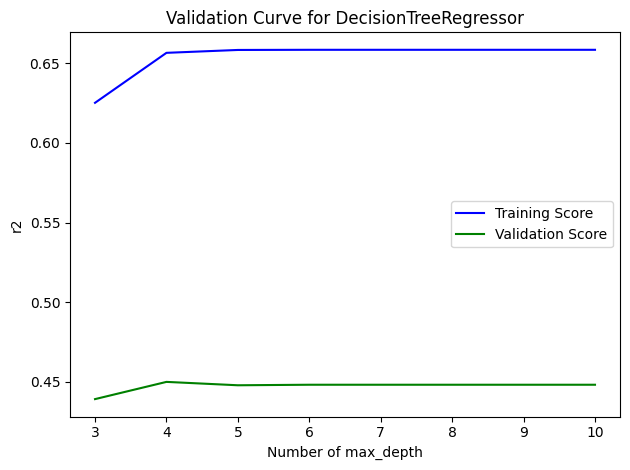

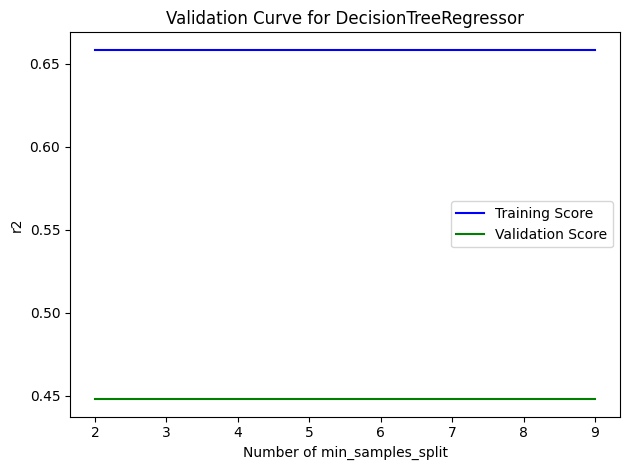

In [53]:

cart_val_params = [["max_depth", range(3, 11)], ["min_samples_split", range(1, 10)]]

for params in cart_val_params:
    val_curve_params(best_dtree, X, y, params[0], params[1])

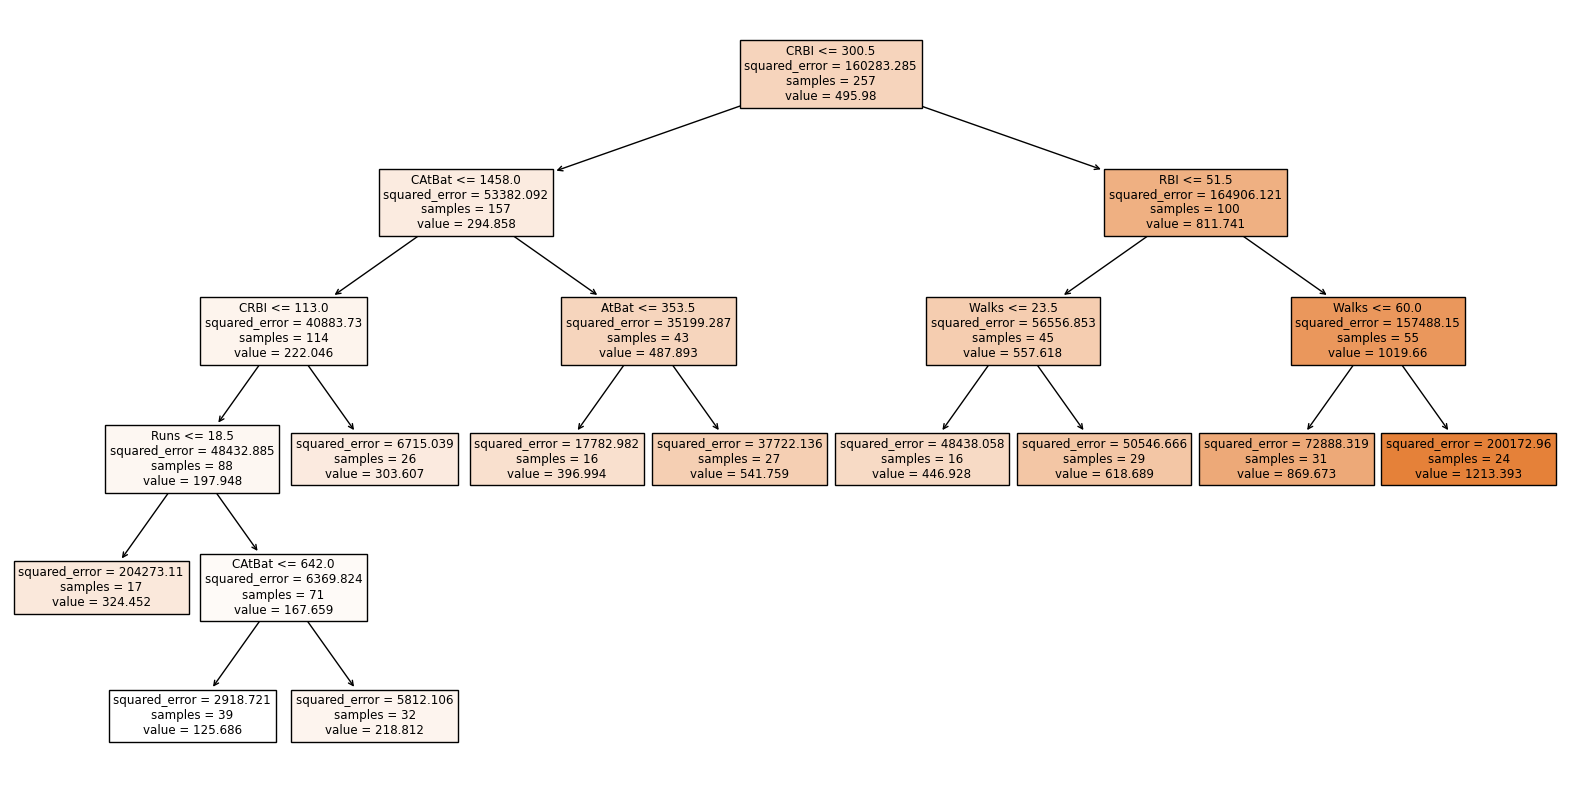

In [54]:
# Plotting the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_dtree, feature_names=X.columns, filled=True)
plt.show()

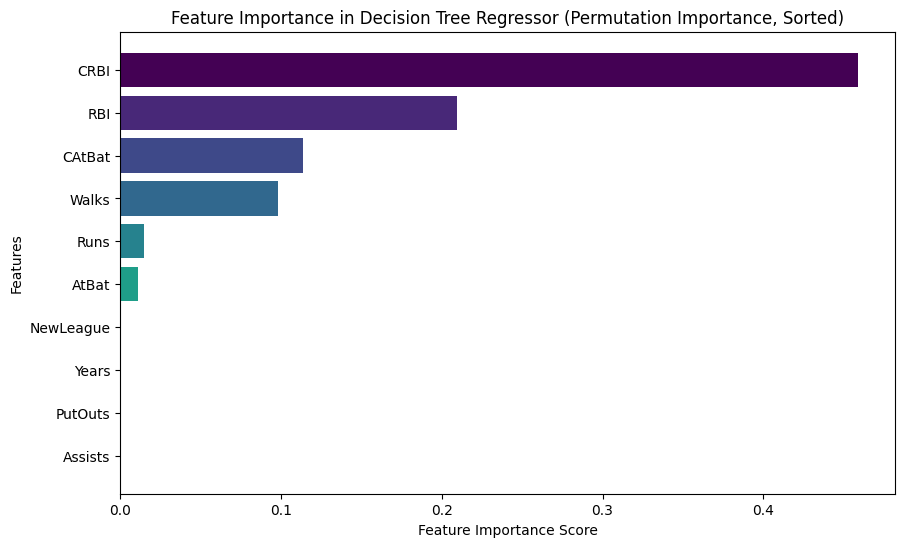

In [55]:
from sklearn.inspection import permutation_importance
result = permutation_importance(best_dtree, X, y, n_repeats=10, random_state=42)
sorted_indices = np.argsort(result.importances_mean)[::-1]
sorted_importances = result.importances_mean[sorted_indices]
sorted_features = np.array(X.columns)[sorted_indices]
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_features)))
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree Regressor (Permutation Importance, Sorted)')
plt.gca().invert_yaxis()
plt.show()

In [56]:
# Get column names with importance score greater than 0
important_features = sorted_features[sorted_importances > 0]
important_features_list = list(important_features)
important_features_list

['CRBI', 'RBI', 'CAtBat', 'Walks', 'Runs', 'AtBat']

### Save model

In [ ]:
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
pipeline = Pipeline([
    ('Regression_Tree_model', best_dtree)
])

In [ ]:
pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'Regression_Tree_model.pkl')

#  Time to Practice part 2 